In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
# 실행하지 말 것
!pip install -U -q PyDrive ## you will have install for every colab session

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [4]:
!ls drive/CIFAR-10
import numpy as np
import matplotlib.pyplot as plt

cifar10_custom.npz


In [0]:
from io import BytesIO
import tensorflow as tf
import numpy as np
from tensorflow.python.lib.io import file_io

f = BytesIO(file_io.read_file_to_string('drive/CIFAR-10/cifar10_custom.npz', binary_mode=True))
cifar_10 = np.load(f)


In [6]:
print("%d imgs loaded"%(cifar_10['trainimg'].shape[0]))
cifar_10['trainimg'][0].shape

50000 imgs loaded


(1024,)

In [7]:
cifar_10.files
cifar_10['trainimg'].shape

(50000, 1024)

In [8]:
trainimg=cifar_10['trainimg'][0:40000,:]
trainlabel = cifar_10['trainlabel'][0:40000,:]
#testimg = cifar_10['testimg']
testimg = cifar_10['trainimg'][40000:50000,:]
testlabel = cifar_10['trainlabel'][40000:,:]

print("%d train images loaded"%(trainimg.shape[0]))
print("%d test images loaded"%(testimg.shape[0]))
# test_label should be (300000,10)

40000 train images loaded
10000 test images loaded


In [9]:
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
%matplotlib inline
print("img PACKAGES LOADED")

img PACKAGES LOADED


In [10]:
plt.imshow(clrTrain[4000])

NameError: ignored

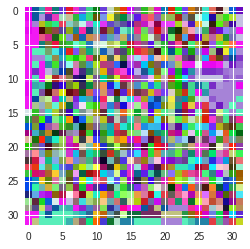

In [11]:
clrTrain = np.zeros([40000,32,32,3])
len(clrTrain)
for i in range(len(clrTrain)):
  tmpimg = np.reshape(trainimg[i],[32,32])
  
  clrTrain[i,:,:,0] = tmpimg*0.299
  clrTrain[i,:,:,1] = tmpimg*0.587
  clrTrain[i,:,:,2] = tmpimg*0.114
  
clrTest = np.zeros([10000,32,32,3])
for i in range(len(clrTest)):
  tmpimg = np.reshape(testimg[i],[32,32])
  clrTest[i,:,:,0] = tmpimg*0.299
  clrTest[i,:,:,1] = tmpimg*0.587
  clrTest[i,:,:,2] = tmpimg*0.114
  

plt.imshow(clrTest[0])


In [12]:
#if cifar_10['use_gray']:
#  nimgch = 1
#else:
  nimgch = 3
ntrain  = clrTrain.shape[0]
nclass = trainlabel.shape[1]
dim = clrTrain.shape[1]*clrTrain.shape[2]*clrTrain.shape[3]
ntest = testimg.shape[0]
nclass2= testlabel.shape[1]
print ("%d TRAIN IMAGES" % (ntrain))
print ("%d TEST IMAGES" % (ntest))
print ("%d DIMENSIONAL INPUT" % (dim))
print ("%d CLASSES" % (nclass))



# network topologies
n_input = dim
n_channel = 32
n_classes = nclass
imgsize=32


40000 TRAIN IMAGES
10000 TEST IMAGES
3072 DIMENSIONAL INPUT
10 CLASSES


In [13]:
# inputs and outputs
x = tf.placeholder("float",[None, n_input])
y = tf.placeholder("float", [None, n_classes])

# network parameters
Inception_layer1 = 32
Inception_layer2 = 64
filter_concat3 = 512
stddev= 0.001
weights = {
    # input [-1,32,32,3]
    'a1' : tf.Variable(tf.random_normal([3,3,nimgch, n_channel], stddev= stddev)),
    'b1' : tf.Variable(tf.random_normal([3,3,n_channel,n_channel*2], stddev=stddev)),
    # a1 [-1, 28,28,32]
    # max_pool 후 : [-1,14,14,32]
    # Inception 1
    # 14*14
    'a3' : tf.Variable(tf.random_normal([1,1,Inception_layer2,Inception_layer1],stddev=stddev)),
    'b3' : tf.Variable(tf.random_normal([1,1,Inception_layer2,Inception_layer1],stddev=stddev)),
    'c3' : tf.Variable(tf.random_normal([3,3,Inception_layer1,Inception_layer1],stddev=stddev)),
    'd3' : tf.Variable(tf.random_normal([1,1,Inception_layer2,Inception_layer1],stddev=stddev)),
    'e3' : tf.Variable(tf.random_normal([3,3,Inception_layer1,Inception_layer1],stddev=stddev)),
    'f3' : tf.Variable(tf.random_normal([3,3,Inception_layer1,Inception_layer1],stddev=stddev)),
    'g3' : tf.Variable(tf.random_normal([1,1,Inception_layer2,Inception_layer1],stddev=stddev)),
   # [?,64,16,32], [1,1,128,128].
    # Inception 2
    'a4' : tf.Variable(tf.random_normal([1,1,128,Inception_layer2*2],stddev=stddev)),
    'b4' : tf.Variable(tf.random_normal([1,1,128,Inception_layer2],stddev=stddev)),
    'c4' : tf.Variable(tf.random_normal([3,3,64,Inception_layer2*2],stddev=stddev)),
    'd4' : tf.Variable(tf.random_normal([1,1,128,Inception_layer2],stddev=stddev)),
    'e4' : tf.Variable(tf.random_normal([3,3,64,Inception_layer2],stddev=stddev)),
    'f4' : tf.Variable(tf.random_normal([3,3,64,Inception_layer2*2],stddev=stddev)),
    'g4' : tf.Variable(tf.random_normal([1,1,128,Inception_layer2*2],stddev=stddev)),
    
    # root
    'a5' : tf.Variable(tf.random_normal([3,3,filter_concat3,512],stddev=stddev)),
    'a6' : tf.Variable(tf.random_normal([1024,1024],stddev=stddev)),
    'b6' : tf.Variable(tf.random_normal([1024,10],stddev=stddev))
    }
biases = {
    'c1' : tf.Variable(tf.random_normal([n_channel], stddev = stddev)),
    'd1' : tf.Variable(tf.random_normal([n_classes], stddev= stddev))
}
print ("network ready")


network ready


In [0]:
def GoogLeNet(_x, _w, _b):
  # Reshape
  _x_r = tf.reshape(_x, shape=[-1, imgsize, imgsize, nimgch])
  # Convolution a1
  # img : 32*32
  _conv2_a1 = tf.nn.conv2d(_x_r, _w['a1'], strides=[1,1,1,1],padding='SAME')
  _conv2_a1_relu = tf.nn.relu(_conv2_a1)
  _conv2_a1_2 = tf.nn.conv2d(_conv2_a1_relu, _w['b1'], strides=[1,2,2,1], padding='SAME')
  _conv2_a1_2_relu = tf.nn.relu(_conv2_a1_2)
  _conv2_max_a1 = tf.nn.max_pool(_conv2_a1_2_relu,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
  _conv2_dropout = tf.nn.dropout(_conv2_max_a1, keep_prob=0.6)
  
  # Convolution a2 이미지 size가 작아서 생략..
  # 1*1
 # _conv2_a2 = tf.nn.conv2d(_conv2_dropout, _w['a2'], strides=[1,1,1,1], padding='SAME')
 # _conv2_a2_relu = tf.nn.relu(_conv2_a2)
  # 3*3
 # _conv2_a2_2 = tf.nn.conv2d(_conv2_a2_relu, _w['b2'],strides=[1,1,1,1], padding='SAME')
 # _conv2_a2_2_relu = tf.nn.relu(_conv2_a2_2)
 # _conv2_max_a2 = tf.nn.max_pool(_conv2_a2_2_relu, ksize=[1,2,2,1], strides=[1,2,2,1])
  
  # Inception 1 (a3)
  # 1*1
  # input img 16*16
  _conv2_i1_1 = tf.nn.conv2d(_conv2_dropout, _w['a3'], strides=[1,1,1,1], padding='SAME')
  _conv2_i1_1_relu = tf.nn.relu(_conv2_i1_1)
  # 3*3
  _conv2_i1_3 = tf.nn.conv2d(_conv2_dropout, _w['b3'], strides=[1,1,1,1], padding='SAME')
  _conv2_i1_3_relu = tf.nn.relu(_conv2_i1_3)
  _conv2_i1_33 = tf.nn.conv2d(_conv2_i1_3_relu, _w['c3'], strides=[1,1,1,1],padding='SAME')
  _conv2_i1_33_relu = tf.nn.relu(_conv2_i1_33)
  # 3*3 두 번
  _conv2_i1_3_v2 = tf.nn.conv2d(_conv2_dropout, _w['d3'], strides=[1,1,1,1],padding='SAME')
  _conv2_i1_3_v2_relu = tf.nn.relu(_conv2_i1_3_v2)
  _conv2_i1_33_v2 = tf.nn.conv2d(_conv2_i1_3_v2_relu, _w['e3'], strides=[1,1,1,1],padding='SAME')
  _conv2_i1_33_v2_relu = tf.nn.relu(_conv2_i1_33_v2)
  _conv2_i1_333_v2 = tf.nn.conv2d(_conv2_i1_33_v2_relu, _w['f3'], strides=[1,1,1,1], padding='SAME')
  _conv2_i1_333_v2_relu = tf.nn.relu(_conv2_i1_333_v2)
  # max_pool
  _conv2_i1_maxpool = tf.nn.max_pool(_conv2_dropout, ksize=[1,2,2,1], strides=[1,1,1,1],padding='SAME')
  _conv2_i1_maxpool_1 = tf.nn.conv2d(_conv2_i1_maxpool, _w['g3'], strides=[1,1,1,1], padding='SAME')
  _conv2_i1_maxpool_1_relu = tf.nn.relu(_conv2_i1_maxpool_1)
  # Inception 1. output
  _conv2_i1_output = tf.concat([_conv2_i1_1_relu, _conv2_i1_33_relu, _conv2_i1_333_v2_relu, _conv2_i1_maxpool_1_relu],3, name='inception_v1_output')
  
  
  # inception 2 (a4)
  # input img 16*16
  # 1*1
  _conv2_i2_1 = tf.nn.conv2d(_conv2_i1_output, _w['a4'], strides=[1,1,1,1], padding='SAME')
  _conv2_i2_1_relu = tf.nn.relu(_conv2_i2_1)
  # 3*3
  _conv2_i2_3 = tf.nn.conv2d(_conv2_i1_output, _w['b4'], strides=[1,1,1,1], padding='SAME')
  _conv2_i2_3_relu = tf.nn.relu(_conv2_i2_3)
  _conv2_i2_33 = tf.nn.conv2d(_conv2_i2_3_relu, _w['c4'], strides=[1,1,1,1], padding='SAME')
  _conv2_i2_33_relu = tf.nn.relu(_conv2_i2_33)
  # 3*3 twice
  _conv2_i2_3_v2 = tf.nn.conv2d(_conv2_i1_output, _w['d4'], strides=[1,1,1,1], padding='SAME')
  _conv2_i2_3_v2_relu = tf.nn.relu(_conv2_i2_3_v2)
  _conv2_i2_33_v2 = tf.nn.conv2d(_conv2_i2_3_v2_relu, _w['e4'],strides=[1,1,1,1],padding='SAME')
  _conv2_i2_33_v2_relu = tf.nn.relu(_conv2_i2_33_v2)
  _conv2_i2_333_v2 = tf.nn.conv2d(_conv2_i2_33_v2_relu, _w['f4'],strides=[1,1,1,1], padding='SAME')
  _conv2_i2_333_v2_relu = tf.nn.relu(_conv2_i2_333_v2)
  # max_pool
  _conv2_i2_maxpool = tf.nn.max_pool(_conv2_i1_output, ksize=[1,2,2,1], strides=[1,1,1,1], padding='SAME')
  _conv2_i2_maxpool_1 = tf.nn.conv2d(_conv2_i2_maxpool, _w['g4'], strides=[1,1,1,1], padding='SAME')
  _conv2_i2_maxpool_1_relu = tf.nn.relu(_conv2_i2_maxpool_1)
  # Inception 2. output
  _conv2_i2_output = tf.concat([_conv2_i2_1_relu, _conv2_i2_33_relu, _conv2_i2_333_v2_relu, _conv2_i2_maxpool_1_relu], 3, name='inception_v2_output')
  
  
  # pooling & conv2 concat
  # 3*3
  # input 16*16
  _conv2_last_3 = tf.nn.conv2d(_conv2_i2_output, _w['a5'], strides=[1,2,2,1], padding='SAME')
  _conv2_last_3_relu = tf.nn.relu(_conv2_last_3)
  _conv2_last_maxpool = tf.nn.max_pool(_conv2_i2_output, ksize=[1,3,3,1], strides=[1,2,2,1],padding='SAME')
  _conv2_last_output = tf.concat([_conv2_last_3_relu, _conv2_last_maxpool],3, name='inception_v3_output')
  
  
  # linear & dropout
  # input 8*8
  _conv2_max_pool = tf.nn.max_pool(_conv2_last_output, ksize=[1,4,4,1], strides=[1,1,1,1],padding='VALID')
  _conv2_flat = tf.reshape(_conv2_max_pool, [-1,1024])
  
  # logit
  _conv2_dense = tf.add(tf.matmul(_conv2_flat, _w['b6']), _b['d1'])
  _logit = tf.nn.dropout(_conv2_dense, keep_prob = 0.6)
  
  _out = {
      'x_r' : _x_r, 'conv2_i1':_conv2_i1_output, 'conv2_i2' : _conv2_i2_output, 'conv2_i3' : _conv2_last_output,  'logit' : _logit
  }
  
  return _out

  
  
  
  
  

In [19]:
# 실험용
# inputs and outputs
x = tf.placeholder("float",[None, n_input])
y = tf.placeholder("float", [None, n_classes])

# network parameters
Inception_layer1 = 32
Inception_layer2 = 64
filter_concat3 = 512
stddev= 0.001
weights = {
    # input
    'a1' : tf.Variable(tf.random_normal([3,3,nimgch, n_channel], stddev= stddev)),
    'b1' : tf.Variable(tf.random_normal([3,3,n_channel,n_channel*2], stddev=stddev)),
    # a1 
    # max_pool 후 : 
    # Inception 1
    # 14*14
    'a3' : tf.Variable(tf.random_normal([1,1,64,64],stddev=stddev)),
    'b3' : tf.Variable(tf.random_normal([1,1,64,64],stddev=stddev)),
    'c3' : tf.Variable(tf.random_normal([3,3,64,64],stddev=stddev)),
    'd3' : tf.Variable(tf.random_normal([1,1,64,64],stddev=stddev)),
    'e3' : tf.Variable(tf.random_normal([3,3,64,64],stddev=stddev)),
    'f3' : tf.Variable(tf.random_normal([3,3,64,64],stddev=stddev)),
    'g3' : tf.Variable(tf.random_normal([1,1,64,64],stddev=stddev)),
   # [?,64,16,32], [1,1,128,128].
    # Inception 2
    'a4' : tf.Variable(tf.random_normal([1,1,128,Inception_layer2*2],stddev=stddev)),
    'b4' : tf.Variable(tf.random_normal([1,1,128,Inception_layer2],stddev=stddev)),
    'c4' : tf.Variable(tf.random_normal([3,3,64,Inception_layer2*2],stddev=stddev)),
    'd4' : tf.Variable(tf.random_normal([1,1,128,Inception_layer2],stddev=stddev)),
    'e4' : tf.Variable(tf.random_normal([3,3,64,Inception_layer2],stddev=stddev)),
    'f4' : tf.Variable(tf.random_normal([3,3,64,Inception_layer2*2],stddev=stddev)),
    'g4' : tf.Variable(tf.random_normal([1,1,128,Inception_layer2*2],stddev=stddev)),
    
    # root
    'a5' : tf.Variable(tf.random_normal([3,3,256,256],stddev=stddev)),
    'b5' : tf.Variable(tf.random_normal([3,3,256,512],stddev=stddev)),
    'a6' : tf.Variable(tf.random_normal([1024,1024],stddev=stddev)),
    'b6' : tf.Variable(tf.random_normal([512,10],stddev=stddev))
    }
biases = {
    'c1' : tf.Variable(tf.random_normal([n_channel], stddev = stddev)),
    'd1' : tf.Variable(tf.random_normal([n_classes], stddev= stddev))
}
print ("network ready")


network ready


In [0]:
# 실험용
def GoogLeNet(_x, _w, _b):
  # Reshape
  _x_r = tf.reshape(_x, shape=[-1, imgsize, imgsize, nimgch])
  # Convolution a1
  # img : 32*32
  _conv2_a1 = tf.nn.conv2d(_x_r, _w['a1'], strides=[1,1,1,1],padding='SAME')
  _conv2_a1_relu = tf.nn.relu(_conv2_a1)
  _conv2_max_a1 = tf.nn.max_pool(_conv2_a1_relu, ksize=[1,3,3,1], strides=[1,2,2,1], padding='SAME')
  _conv2_a1_2 = tf.nn.conv2d(_conv2_max_a1, _w['b1'], strides=[1,1,1,1], padding='SAME')
  _conv2_a1_2_relu = tf.nn.relu(_conv2_a1_2)
  _conv2_max_a2 = tf.nn.max_pool(_conv2_a1_2_relu,ksize=[1,3,3,1],strides=[1,2,2,1],padding='SAME')
  
  
  # Convolution a2 이미지 size가 작아서 생략..
  # 1*1
 # _conv2_a2 = tf.nn.conv2d(_conv2_dropout, _w['a2'], strides=[1,1,1,1], padding='SAME')
 # _conv2_a2_relu = tf.nn.relu(_conv2_a2)
  # 3*3
 # _conv2_a2_2 = tf.nn.conv2d(_conv2_a2_relu, _w['b2'],strides=[1,1,1,1], padding='SAME')
 # _conv2_a2_2_relu = tf.nn.relu(_conv2_a2_2)
 # _conv2_max_a2 = tf.nn.max_pool(_conv2_a2_2_relu, ksize=[1,2,2,1], strides=[1,2,2,1])
  
  # Inception 1 (a3)
  # 1*1
  # input img 16*16
  _conv2_i1_1 = tf.nn.conv2d(_conv2_max_a2, _w['a3'], strides=[1,1,1,1], padding='SAME')
  _conv2_i1_1_relu = tf.nn.relu(_conv2_i1_1)
  # 3*3
  _conv2_i1_3 = tf.nn.conv2d(_conv2_max_a2, _w['b3'], strides=[1,1,1,1], padding='SAME')
  _conv2_i1_3_relu = tf.nn.relu(_conv2_i1_3)
  _conv2_i1_33 = tf.nn.conv2d(_conv2_i1_3_relu, _w['c3'], strides=[1,1,1,1],padding='SAME')
  _conv2_i1_33_relu = tf.nn.relu(_conv2_i1_33)
  # 3*3 두 번
  _conv2_i1_3_v2 = tf.nn.conv2d(_conv2_max_a2, _w['d3'], strides=[1,1,1,1],padding='SAME')
  _conv2_i1_3_v2_relu = tf.nn.relu(_conv2_i1_3_v2)
  _conv2_i1_33_v2 = tf.nn.conv2d(_conv2_i1_3_v2_relu, _w['e3'], strides=[1,1,1,1],padding='SAME')
  _conv2_i1_33_v2_relu = tf.nn.relu(_conv2_i1_33_v2)
  _conv2_i1_333_v2 = tf.nn.conv2d(_conv2_i1_33_v2_relu, _w['f3'], strides=[1,1,1,1], padding='SAME')
  _conv2_i1_333_v2_relu = tf.nn.relu(_conv2_i1_333_v2)
  # max_pool
  _conv2_i1_maxpool = tf.nn.max_pool(_conv2_max_a2, ksize=[1,1,1,1], strides=[1,1,1,1],padding='SAME')
  _conv2_i1_maxpool_1 = tf.nn.conv2d(_conv2_i1_maxpool, _w['g3'], strides=[1,1,1,1], padding='SAME')
  _conv2_i1_maxpool_1_relu = tf.nn.relu(_conv2_i1_maxpool_1)
  # Inception 1. output
  _conv2_i1_output = tf.concat([_conv2_i1_1_relu, _conv2_i1_33_relu, _conv2_i1_333_v2_relu, _conv2_i1_maxpool_1_relu],3, name='inception_v1_output')
  
  
  # inception 2 (a4)
  # input img 8*8
  # 1*1
 # _conv2_i2_1 = tf.nn.conv2d(_conv2_i1_output, _w['a4'], strides=[1,2,2,1], padding='SAME')
 # _conv2_i2_1_relu = tf.nn.relu(_conv2_i2_1)
 # # 3*3
 # _conv2_i2_3 = tf.nn.conv2d(_conv2_i1_output, _w['b4'], strides=[1,1,1,1], padding='SAME')
 # _conv2_i2_3_relu = tf.nn.relu(_conv2_i2_3)
 # _conv2_i2_33 = tf.nn.conv2d(_conv2_i2_3_relu, _w['c4'], strides=[1,2,2,1], padding='SAME')
 # _conv2_i2_33_relu = tf.nn.relu(_conv2_i2_33)
 # # 3*3 twice
 # _conv2_i2_3_v2 = tf.nn.conv2d(_conv2_i1_output, _w['d4'], strides=[1,1,1,1], padding='SAME')
 # _conv2_i2_3_v2_relu = tf.nn.relu(_conv2_i2_3_v2)
 # _conv2_i2_33_v2 = tf.nn.conv2d(_conv2_i2_3_v2_relu, _w['e4'],strides=[1,1,1,1],padding='SAME')
 # _conv2_i2_33_v2_relu = tf.nn.relu(_conv2_i2_33_v2)
 # _conv2_i2_333_v2 = tf.nn.conv2d(_conv2_i2_33_v2_relu, _w['f4'],strides=[1,2,2,1], padding='SAME')
 # _conv2_i2_333_v2_relu = tf.nn.relu(_conv2_i2_333_v2)
 # # max_pool
 # _conv2_i2_maxpool = tf.nn.max_pool(_conv2_i1_output, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
 # _conv2_i2_maxpool_1 = tf.nn.conv2d(_conv2_i2_maxpool, _w['g4'], strides=[1,1,1,1], padding='SAME')
 # _conv2_i2_maxpool_1_relu = tf.nn.relu(_conv2_i2_maxpool_1)
 # # Inception 2. output
 # _conv2_i2_output = tf.concat([_conv2_i2_1_relu, _conv2_i2_33_relu, _conv2_i2_333_v2_relu, _conv2_i2_maxpool_1_relu], 3, name='inception_v2_output')
  
  
  # pooling & conv2 concat
  # 3*3
  # input 8*8
  _conv2_last_3 = tf.nn.conv2d(_conv2_i1_output, _w['a5'], strides=[1,1,1,1], padding='VALID')
  _conv2_last_3_relu = tf.nn.relu(_conv2_last_3)
  _conv2_last_33 = tf.nn.conv2d(_conv2_last_3_relu, _w['b5'], strides=[1,1,1,1], padding='VALID')
  _conv2_last_33_relu = tf.nn.relu(_conv2_last_33)
  #_conv2_last_maxpool = tf.nn.max_pool(_conv2_i2_output, ksize=[1,3,3,1], strides=[1,2,2,1],padding='SAME')
  #_conv2_last_output = tf.concat([_conv2_last_3_relu, _conv2_last_maxpool],3, name='inception_v3_output')
  
  
  # linear & dropout
  # input 4*4
  _conv2_max_pool = tf.nn.max_pool(_conv2_last_33_relu, ksize=[1,4,4,1], strides=[1,1,1,1],padding='VALID')
  _conv2_logit_dropout = tf.nn.dropout(_conv2_max_pool, keep_prob = 0.7)
  _conv2_flat = tf.reshape(_conv2_logit_dropout, [-1,512])
  
  # logit
  _logit = tf.add(tf.matmul(_conv2_flat, _w['b6']), _b['d1'])
  #
  
  _out = {
      'x_r' : _x_r, 'conv2_i1':_conv2_i1_output, 
      #'conv2_i2' : _conv2_i2_output, 
      #'conv2_i3' : _conv2_last_output,  
      'logit' : _logit
  }
  
  return _out 

In [0]:
def CNN(_x, _w, _b):
  # Reshape
  _x_r = tf.reshape(_x, shape=[-1, imgsize,imgsize,nimgch])
  # Convolution
  _conv1 = tf.nn.conv2d(_x_r, _w['c1'], strides=[1,1,1,1], padding='SAME')
  # ADD BIAS
  _conv2 = tf.nn.bias_add(_conv1, _b['c1'])
  # ReLu
  _conv3 = tf.nn.relu(_conv2)
  # Max_pool
  _pool = tf.nn.max_pool(_conv3, ksize=[1,2,2,1], strides=[1,2,2,1],padding='SAME')
  
  # Vectorize
  _dense = tf.reshape(_pool, [-1, _w['d1'].get_shape().as_list()[0]])
  # dense
  _logit = tf.add(tf.matmul(_dense, _w['d1']), _b['d1'])
  _out = {
      'x_r':_x_r, 'conv1':_conv1, 'conv2':_conv2, 'conv3': _conv3, 'pool':_pool
      , 'dense':_dense , 'logit':_logit
  }
  return _out

In [0]:
# prediction
cnnout = CNN(x, weights, biases)

# loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=cnnout['logit']))
optm = tf.train.AdamOptimizer(learning_rate=0.0002).minimize(cost)
corr = tf.equal(tf.argmax(cnnout['logit'],1), tf.argmax(y,1))
accr = tf.reduce_mean(tf.cast(corr,"float"))

#initializer
init = tf.global_variables_initializer()
print("functions Ready")

NameError: ignored

In [22]:
# prediction
GoogLeNetout = GoogLeNet(x, weights, biases)

# loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=GoogLeNetout['logit']))
optm = tf.train.AdamOptimizer(learning_rate=0.0002).minimize(cost)
corr = tf.equal(tf.argmax(GoogLeNetout['logit'],1), tf.argmax(y,1))
accr = tf.reduce_mean(tf.cast(corr,"float"))

#initializer
init = tf.global_variables_initializer()
print("functions Ready")

functions Ready


In [23]:
# Parameters
training_epochs=300
batch_size=150
disp_each = 10
disp_each=10
plot_each = 10

# Launch the graph
sess= tf.Session()
sess.run(init)

# optimize

for epoch in range(training_epochs):
  total_batch = int(ntrain/batch_size)
  randpermlist = np.random.permutation(ntrain)
  sum_cost = 0.
  for i in range(total_batch):
    randidx = randpermlist[i*batch_size:min((i+1)*batch_size,ntrain-1)]
    batch_xs = np.reshape(clrTrain[randidx,:,:,:],[-1,dim])
    batch_ys = trainlabel[randidx,:]
    feeds = {x:batch_xs, y:batch_ys}
    sess.run(optm, feed_dict = feeds)
    sum_cost += sess.run(cost, feed_dict= feeds)
  avg_cost = sum_cost/total_batch
  print('Epoch : ','%04d'%(epoch+1), 'cost = ','{:.9f}'.format(avg_cost))
  
  
#display

if(epoch+1)%disp_each == 0 or epoch == training_epoch-1:
  print ("Epoch: %03d/%03d cost : %.9f" % (epoch+1, training_epochs, avg_cost))
  feeds = {x: batch_xs, y:batch_ys}
  train_acc = sess.run(accr, feed_dict=feeds)
  print (" TRAIN ACCURACY : %.3f" % (train_acc))
  
  print ("Epoch: %03d/%03d, let's test." % (epoch+1, training_epochs))
  randpermlist_test = np.random.permutation(ntest)
  k=3
  randidx = randpermlist_test[k:(k+5000)]
  batch_xs = np.reshape(clrTest[randidx,:,:,:],[-1,dim])
  batch_ys = testlabel[randidx,:]
  feeds = {x: batch_xs, y:batch_ys}
  test_acc = sess.run(accr, feed_dict=feeds)
  print(" Test Accuracy : %.3f"%(test_acc))

           
# plot
#plt.plot(cost)
#plt.show()

Epoch :  0001 cost =  2.284226208
Epoch :  0002 cost =  2.161988433
Epoch :  0003 cost =  2.040855725
Epoch :  0004 cost =  1.946779119
Epoch :  0005 cost =  1.859278168
Epoch :  0006 cost =  1.807251046
Epoch :  0007 cost =  1.768871945
Epoch :  0008 cost =  1.733961899
Epoch :  0009 cost =  1.705395415
Epoch :  0010 cost =  1.679789584
Epoch :  0011 cost =  1.659462702
Epoch :  0012 cost =  1.635190275
Epoch :  0013 cost =  1.611420973
Epoch :  0014 cost =  1.590014681
Epoch :  0015 cost =  1.577340659
Epoch :  0016 cost =  1.557621749
Epoch :  0017 cost =  1.527894858
Epoch :  0018 cost =  1.505271798
Epoch :  0019 cost =  1.480210911
Epoch :  0020 cost =  1.451763857
Epoch :  0021 cost =  1.430463563
Epoch :  0022 cost =  1.409938882
Epoch :  0023 cost =  1.394143367
Epoch :  0024 cost =  1.368153188
Epoch :  0025 cost =  1.353491992
Epoch :  0026 cost =  1.332996467
Epoch :  0027 cost =  1.313449186
Epoch :  0028 cost =  1.296041075
Epoch :  0029 cost =  1.279610426
Epoch :  0030 

Epoch :  0077 cost =  0.714390447
Epoch :  0078 cost =  0.708796865
Epoch :  0079 cost =  0.694107733
Epoch :  0080 cost =  0.688150936
Epoch :  0081 cost =  0.673675303
Epoch :  0082 cost =  0.669066049
Epoch :  0083 cost =  0.671473623
Epoch :  0084 cost =  0.658822833
Epoch :  0085 cost =  0.650006764
Epoch :  0086 cost =  0.646326116
Epoch :  0087 cost =  0.639633052
Epoch :  0088 cost =  0.629344058
Epoch :  0089 cost =  0.624946125
Epoch :  0090 cost =  0.618164372
Epoch :  0091 cost =  0.611636756
Epoch :  0092 cost =  0.617599982
Epoch :  0093 cost =  0.610433904
Epoch :  0094 cost =  0.603218878
Epoch :  0095 cost =  0.593728648
Epoch :  0096 cost =  0.588794645
Epoch :  0097 cost =  0.578627712
Epoch :  0098 cost =  0.578629208
Epoch :  0099 cost =  0.567778526
Epoch :  0100 cost =  0.573131357
Epoch :  0101 cost =  0.561795743
Epoch :  0102 cost =  0.561713093
Epoch :  0103 cost =  0.554754332
Epoch :  0104 cost =  0.558215437
Epoch :  0105 cost =  0.542288831
Epoch :  0106 

Epoch :  0153 cost =  0.429243317
Epoch :  0154 cost =  0.425548948
Epoch :  0155 cost =  0.414304778
Epoch :  0156 cost =  0.419129533
Epoch :  0157 cost =  0.409301961
Epoch :  0158 cost =  0.407829553
Epoch :  0159 cost =  0.410044692
Epoch :  0160 cost =  0.414178826
Epoch :  0161 cost =  0.411093752
Epoch :  0162 cost =  0.406663361
Epoch :  0163 cost =  0.410464592
Epoch :  0164 cost =  0.408735052
Epoch :  0165 cost =  0.399371513
Epoch :  0166 cost =  0.399428018
Epoch :  0167 cost =  0.411287690
Epoch :  0168 cost =  0.399238674
Epoch :  0169 cost =  0.391923591
Epoch :  0170 cost =  0.396387637
Epoch :  0171 cost =  0.391740204
Epoch :  0172 cost =  0.392524858
Epoch :  0173 cost =  0.398632132
Epoch :  0174 cost =  0.392439402
Epoch :  0175 cost =  0.390901637
Epoch :  0176 cost =  0.384834542
Epoch :  0177 cost =  0.385883990
Epoch :  0178 cost =  0.384720312
Epoch :  0179 cost =  0.389724058
Epoch :  0180 cost =  0.380547831
Epoch :  0181 cost =  0.373480477
Epoch :  0182 

Epoch :  0229 cost =  0.346812419
Epoch :  0230 cost =  0.345445972
Epoch :  0231 cost =  0.347793276
Epoch :  0232 cost =  0.342414634
Epoch :  0233 cost =  0.340775963
Epoch :  0234 cost =  0.340472087
Epoch :  0235 cost =  0.340349599
Epoch :  0236 cost =  0.344105637
Epoch :  0237 cost =  0.339423044
Epoch :  0238 cost =  0.332325644
Epoch :  0239 cost =  0.335250697
Epoch :  0240 cost =  0.335204099
Epoch :  0241 cost =  0.332662691
Epoch :  0242 cost =  0.335735734
Epoch :  0243 cost =  0.333670514
Epoch :  0244 cost =  0.338965891
Epoch :  0245 cost =  0.334125852
Epoch :  0246 cost =  0.336206957
Epoch :  0247 cost =  0.330679001
Epoch :  0248 cost =  0.329561516
Epoch :  0249 cost =  0.325174570
Epoch :  0250 cost =  0.324939301
Epoch :  0251 cost =  0.325147273
Epoch :  0252 cost =  0.338023341
Epoch :  0253 cost =  0.332165737
Epoch :  0254 cost =  0.323280207
Epoch :  0255 cost =  0.330453389
Epoch :  0256 cost =  0.329599091
Epoch :  0257 cost =  0.331384915
Epoch :  0258 